<a href="https://colab.research.google.com/github/lalahehe234/mldataset/blob/main/CheatCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Navie Bayes

Text(109.44999999999997, 0.5, 'Predicted')

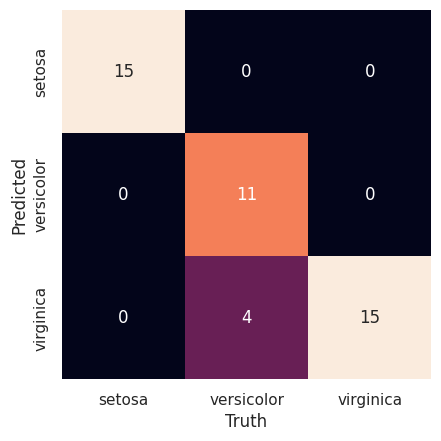

In [21]:
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set ()

train = pd.read_csv("iris_train.csv")
test = pd.read_csv("iris_test.csv")

xtrain = train.drop('Species',axis = 1)
ytrain = train.loc[:,'Species']
xtest = test.drop('Species',axis = 1)
ytest = test.loc[:,'Species']

model = GaussianNB()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
mat = confusion_matrix(pred,ytest)
names = np.unique(pred)
sns.heatmap(mat,square = True,annot = True,fmt = 'd',cbar = False,xticklabels = names,yticklabels = names)
plt.xlabel("Truth")
plt.ylabel("Predicted")

Linear Regression

(30, 1)
(30,)
(22, 1)
(22,)
(8, 1)
(8,)


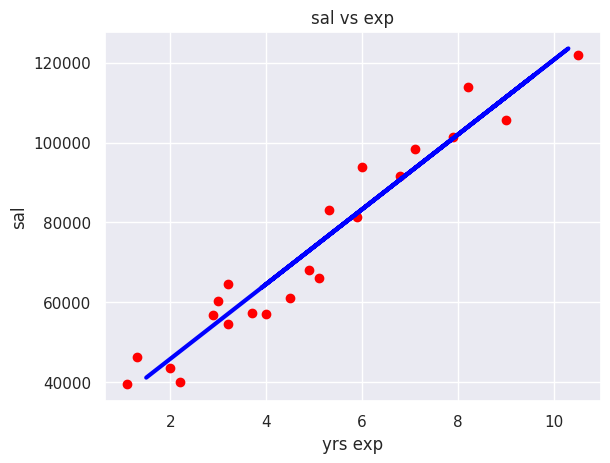

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data  = pd.read_csv('Salary_Data.csv')
data.head()

x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print (x.shape)
print (y.shape)

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size = 0.25,random_state = 0)
print (xtrain.shape)
print (ytrain.shape)
print (xtest.shape)
print (ytest.shape)

model = LinearRegression()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

plt.scatter(xtrain,ytrain,color = "red",label = "training")
plt.plot(xtest,y_pred,color = "blue",linewidth = 3,label = "reg line")
plt.title("sal vs exp")
plt.xlabel("yrs exp")
plt.ylabel("sal")
plt.show()


Logistic Regression

In [48]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("winequality-red.csv")
data.head()

data['quality'] = data['quality'].map({3:'bad',4:'bad',5:'bad',6:'good',7:'good',8:'good'})
data['quality'].value_counts()

le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['quality'].value_counts()

x = data.iloc[:,:11]
y = data.iloc[:,11]
print(x.shape)
print(y.shape)

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size = 0.25,random_state = 44)
print (xtrain.shape)
print (ytrain.shape)
print (xtest.shape)
print (ytest.shape)

sc=StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

model = LogisticRegression()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print("Training accuracy:", model.score(xtrain, ytrain))
print("Testing accuracy:", model.score(xtest, ytest))
print(classification_report(ytest, y_pred))
print(confusion_matrix(ytest, y_pred))

(1599, 11)
(1599,)
(1199, 11)
(1199,)
(400, 11)
(400,)
Training accuracy: 0.7472894078398665
Testing accuracy: 0.7225
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       204
           1       0.70      0.76      0.73       196

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

[[141  63]
 [ 48 148]]


SVM

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

salary = pd.read_csv('SalaryData_Train (1).csv')
salary_test = pd.read_csv('SalaryData_Test.csv')
salary

salary2 =  salary.copy()
le = LabelEncoder()
salary2['workclass'] = le.fit_transform(salary2['workclass'])
salary2['education'] = le.fit_transform(salary2['education'])
salary2['maritalstatus'] = le.fit_transform(salary2['maritalstatus'])
salary2['occupation'] = le.fit_transform(salary2['occupation'])
salary2['relationship'] = le.fit_transform(salary2['relationship'])
salary2['race'] = le.fit_transform(salary2['race'])
salary2['sex'] = le.fit_transform(salary2['sex'])
salary2['native'] = le.fit_transform(salary2['native'])
salary2['Salary'] = le.fit_transform(salary2['Salary'])

salary_test['workclass'] = le.fit_transform(salary_test['workclass'])
salary_test['education'] = le.fit_transform(salary_test['education'])
salary_test['maritalstatus'] = le.fit_transform(salary_test['maritalstatus'])
salary_test['occupation'] = le.fit_transform(salary_test['occupation'])
salary_test['relationship'] = le.fit_transform(salary_test['relationship'])
salary_test['race'] = le.fit_transform(salary_test['race'])
salary_test['sex'] = le.fit_transform(salary_test['sex'])
salary_test['native'] = le.fit_transform(salary_test['native'])
salary_test['Salary'] = le.fit_transform(salary_test['Salary'])
salary2

x = salary2.drop(labels='Salary', axis=1)
y = salary2[['Salary']]
x_test = salary_test.drop(labels='Salary', axis=1)
y_test = salary_test[['Salary']]
y.shape, y_test.shape

columns = x.columns
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=columns)
y2 = y.copy()
y2 = y2.values.ravel()


svm = SVC(kernel='linear')
svm.fit(x_scaled,y2)
y_pred = svm.predict(x_test)
print('Accuracy :', round(accuracy_score(y_test,y_pred),4))
print('Precision :', round(precision_score(y_test,y_pred),4))
print('Recall :', round(recall_score(y_test,y_pred),4))
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Accuracy : 0.2457
Precision : 0.2457
Recall : 1.0
Confusion matrix :
 [[    0 11360]
 [    0  3700]]


Decision Tree

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('winequality-red.csv')
data.head()

data.columns

data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',6: 'good', 7: 'good', 8: 'good'})
data['quality'].value_counts()

le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['quality'].value_counts

x = data.iloc[:,:11]
y = data.iloc[:,11]
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

(1599, 11)
(1599,)
(1199, 11)
(1199,)
(400, 11)
(400,)
Training accuracy : 1.0
Testing accuracy : 0.72
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       204
           1       0.71      0.72      0.72       196

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

[[147  57]
 [ 55 141]]


Random Forest

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')

fraud = pd.read_csv('Fraud_check (1).csv')
fraud
fraud.isna().sum()

fraud2 = fraud.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
fraud2['Encoded_Undergrad'] = le.fit_transform(fraud2['Undergrad'])
fraud2['Encoded_Marital.Status'] = le.fit_transform(fraud2['Marital.Status'])
fraud2['Encoded_Taxable.Income'] = le.fit_transform(fraud2['Taxable.Income'])
fraud2['Encoded_Urban'] = le.fit_transform(fraud2['Urban'])
fraud2

del fraud2['Undergrad']
del fraud2['Marital.Status']
del fraud2['Taxable.Income']
del fraud2['Urban']
fraud2

x=fraud2.iloc[:, [0,1,2,3,5]]
y=fraud2.iloc[:,4]
x

y

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12345)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion='gini', max_depth=7)
rf_classifier.fit(X_train,y_train)

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier,
                           param_grid = {'criterion' : ['gini' , 'entropy'],
                                         'max_depth' : [4,5,6,7,8,9,10] },
                           cv = 5)
grid_search.fit(x,y)

grid_search.best_params_

grid_search.best_score_

y_pred_train = rf_classifier.predict(X_train)
y_pred_train

y_pred_test = rf_classifier.predict(X_test)

from sklearn.metrics import accuracy_score,c onfusion_matrix ,classification_report,
precision_score, recall_score,roc_auc_score, roc_curve
accuracy_score(y_train,y_pred_train)
print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

fpr, tpr, thresholds = roc_curve(y, rf_classifier.predict_proba (x)[:,1])
auc = roc_auc_score(y_train,y_pred_train)
print('auc accuracy:',auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

accuracy_score(y_test,y_pred_test)
print(confusion_matrix(y_test,y_pred_test))

from pickle import dump
dump(rf_classifier,open('fraud_rf_model.pkl','wb'))
from pickle import load
loaded_pkl_file = load(open('fraud_rf_model.pkl','rb'))
predicted_answers = loaded_pkl_file.predict(X_test)
accuracy_score(y_test,predicted_answers)


ValueError: ignored

K-Means

     Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

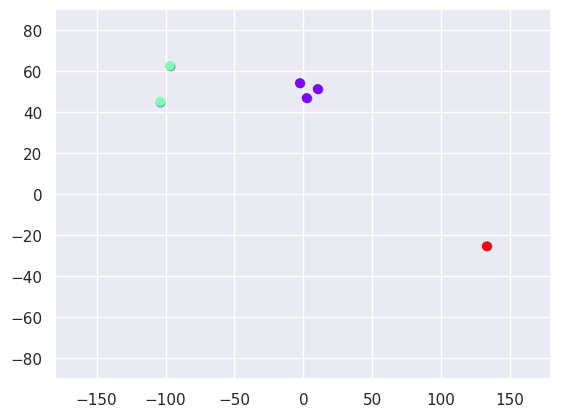

In [8]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

data = pd.read_csv('3.01.Countryclusters.csv')
print(data)

plt.scatter(data["Longitude"],data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

x=data.iloc[:,1:3]
x

kmeans = KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

plt.scatter(data["Longitude"],data["Latitude"],c = data_with_clusters['Clusters'] , cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

PCA

     Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

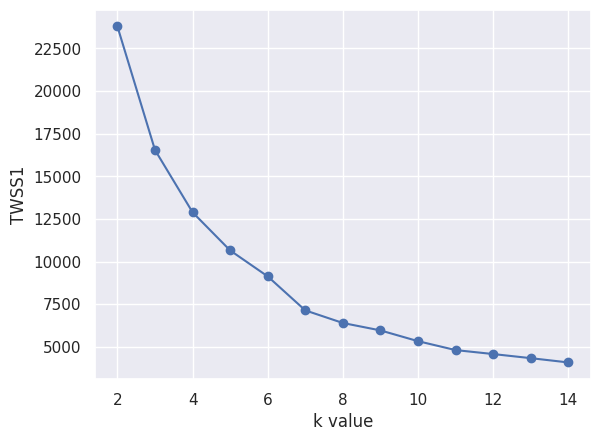

2    59
0    57
3    39
1    23
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(178, 4)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Load the data
norm_data = pd.read_csv('wine.csv')

# Display the data and its shape
print(norm_data)
print(norm_data.shape)

# Perform PCA
pca = PCA()
pca_values = pca.fit_transform(norm_data)
print(pca_values.shape)

# Explained variance ratio
var = pca.explained_variance_ratio_
print(var)

# Cumulative explained variance
cum_var = np.cumsum(np.round(var, decimals=4) * 100)
print(cum_var)

# Create a DataFrame with PCA values and drop specified columns
pca_data = pd.DataFrame(pca_values)
pca_data = pca_data.drop(columns=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Range of values for k
k1 = list(range(2, 15))
TWSS1 = []

# Perform K-means clustering for different values of k
for i in k1:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_data)
    WSS1 = []

    # Calculate Within Sum of Squares for each cluster
    for j in range(i):
        WSS1.append(sum(cdist(pca_data.iloc[kmeans.labels_ == j, :], kmeans.cluster_centers_[j].reshape(1, pca_data.shape[1]), metric='euclidean')))

    # Append Total Within Sum of Squares for the current k
    TWSS1.append(sum(WSS1))

# Plot the Total Within Sum of Squares for different values of k
plt.plot(k1, TWSS1, 'bo-')
plt.xlabel('k value')
plt.ylabel('TWSS1')
plt.show()

# Fit K-means with k=4 (chosen from the plot) on PCA data
model1 = KMeans(n_clusters=4).fit(pca_data)
clusters_pca_k = pd.DataFrame(model1.labels_)

# Display the count of samples in each cluster
k_means_pca = clusters_pca_k.value_counts()
print(k_means_pca)

pca_data.shape


KNN

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  

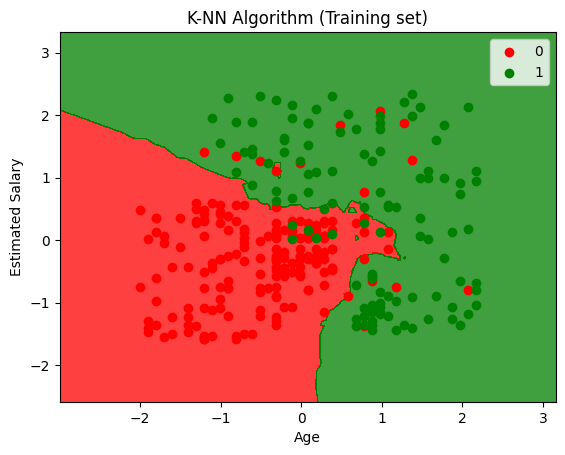

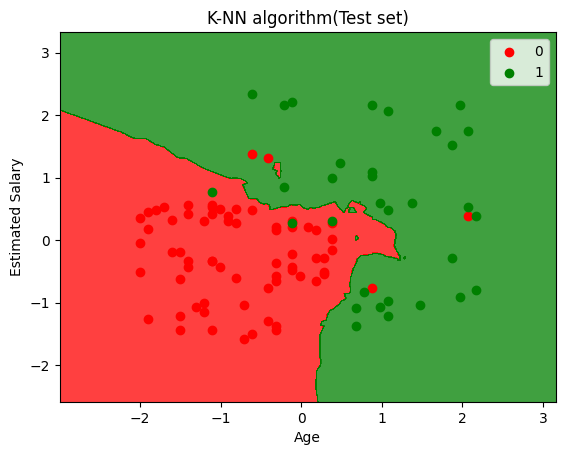

Model Accuracy: 0.9300
Run Time: 44.219


In [52]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.metrics import confusion_matrix
import time
start_time = time.time()

data_set= pd.read_csv('User_Data.csv')
print(data_set)

x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values
print(x)

print(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

y_pred= classifier.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step
=0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
 mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step
=0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
 mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN algorithm(Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

model = KNeighborsClassifier(n_neighbors=5)
model.fit( x_train, y_train )

accuracy = model.score(x_test, y_test)
print( "Model Accuracy: %.4f" % accuracy )
end_time = time.time()
print( "Run Time: %.3f" % (end_time - start_time) )

ANN

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data = pd.read_csv('winequality-red.csv')
data.head()

data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',6: 'good', 7: 'good', 8: 'good'})
data['quality'].value_counts()

le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['quality'].value_counts()

x = data.iloc[:,:11]
y = data.iloc[:,11]
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

model = Sequential()
# first hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# second hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 10, epochs = 100)

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

(1599, 11)
(1599,)
(1199, 11)
(1199,)
(400, 11)
(400,)
Epoch 1/100
120/120 [==============================] - 5s 7ms/step - loss: 0.6839 - accuracy: 0.5413
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 0.5941 - accuracy: 0.7181
Epoch 3/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7373
Epoch 4/100
120/120 [==============================] - 1s 8ms/step - loss: 0.5165 - accuracy: 0.7398
Epoch 5/100
120/120 [==============================] - 1s 10ms/step - loss: 0.5110 - accuracy: 0.7423
Epoch 6/100
120/120 [==============================] - 1s 8ms/step - loss: 0.5083 - accuracy: 0.7523
Epoch 7/100
120/120 [==============================] - 1s 5ms/step - loss: 0.5075 - accuracy: 0.7465
Epoch 8/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7540
Epoch 9/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5054 - accuracy: 0.7523
Epoch 10/100
120/120 [=============